In [1]:
import sys

sys.path.append('../')

from classes import *

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_run = EmceeRun(emcee_file)

emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

In [3]:
plotter = Plotter(bgs, emcee_run)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='redshift ($z$)', ylabel='best-fit $\\log M_*$'>)

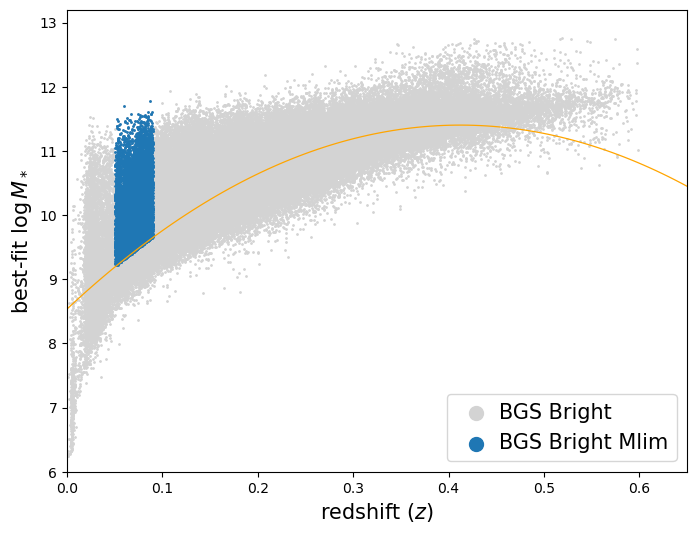

In [4]:
plotter.plot_selected_data(0.05, 0.09)

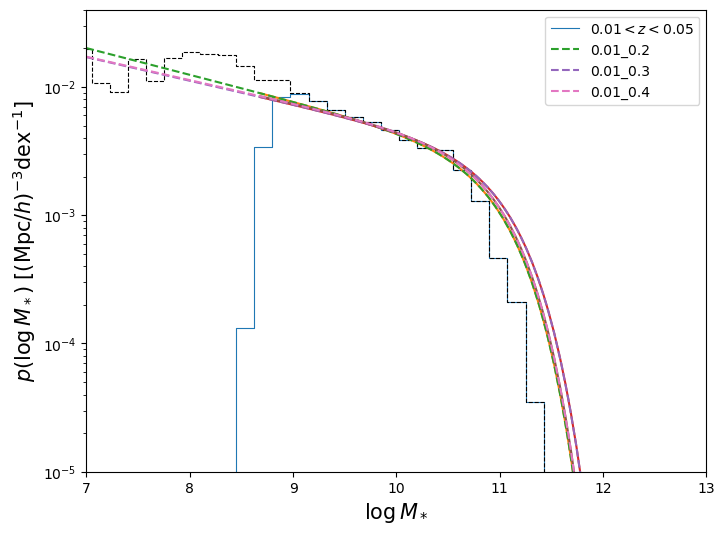

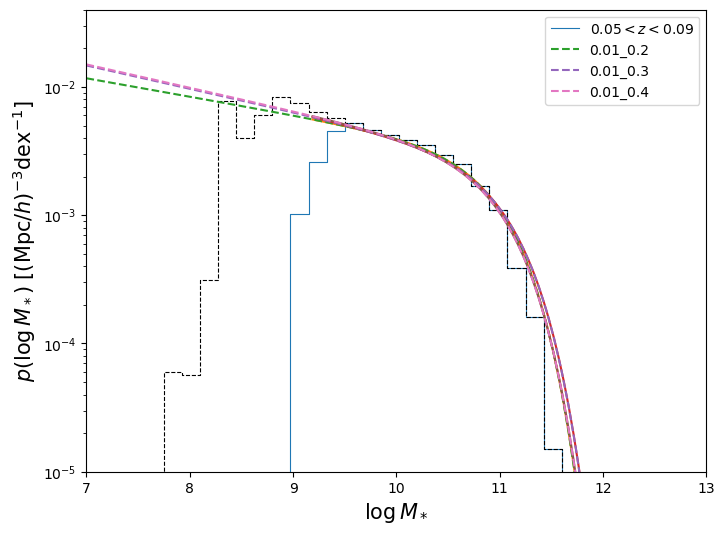

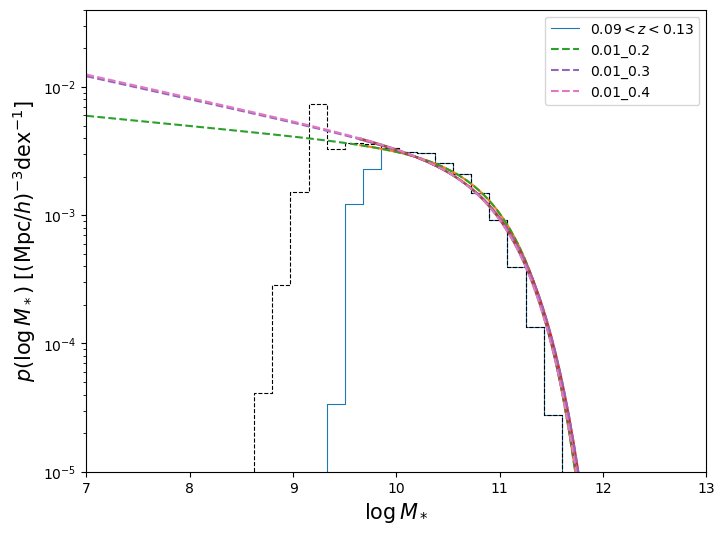

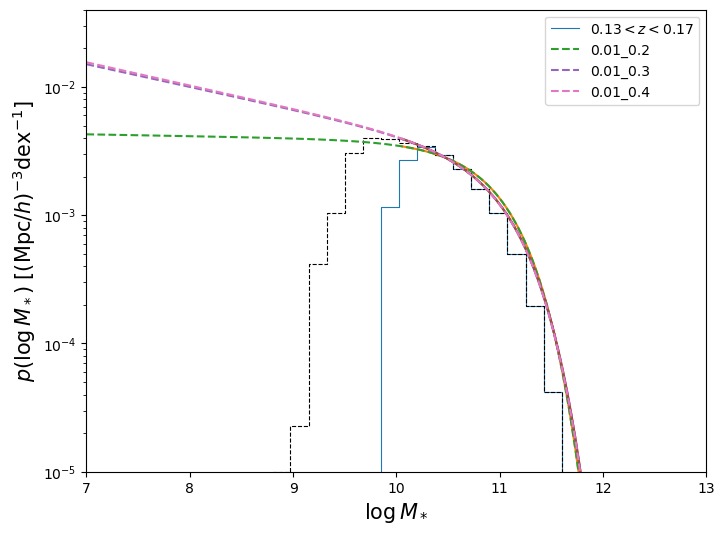

In [7]:
zmins = np.array([0.01 + 0.04 * i for i in range(4)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(4)])

x_lin_ext = np.linspace(7, 14, 100)

# fig = plt.figure(figsize=(15,15))

plot_params_ext = {'color': 'orange', 'linestyle':'--'}
plot_params = {'color':'orange', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(4), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    # plt.subplot(2,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)

    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin}< z <{zmax:.2f}$'})

    for info in ['0.01_0.2', '0.01_0.3', '0.01_0.4']:
        emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file=info)
        emcee_run = EmceeRun(emcee_file)
    
        emcee_run.set_best_params(discard=150)
        best_params = emcee_run.get_best_params()
        
        z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
        n = z_smf.normalisation(best_params)

        x_lin = np.linspace(z_smf.mlim.min(), 14, 100)
        plot_params_ext = {'label':f'{info}', 'linestyle':'--'}
        plot_params = {'linestyle':'-'}

        Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
        Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    # print(z_smf.mlim.min())
    
    
        
    
    plt.legend(loc='best')
    plt.show()

    

    
    
    

In [ ]:
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

In [ ]:
h, b, _h, _b = vmax_hist.histogram_norm(0.01, 0.05)

In [ ]:
z_smf = ZSchechterModel(bgs, 0.01, 0.05, 0.03)

In [ ]:
n = z_smf.normalisation(emcee_run.get_best_params())

In [ ]:
plotter.plot_emcee_samples()

In [ ]:
x_lin = np.linspace(7, 14, 100)

plotter.plot_vmax_hist(h, b, _h, _b)
Plotter.plot_zschechter(x_lin, 0.03, n, emcee_run.get_best_params())
plt.show()

In [ ]:
zsmf_0509 = ZSchechterModel(bgs, 0.05, 0.09, 0.07)

In [ ]:
n0509 = zsmf_0509.normalisation(emcee_run.get_best_params())

In [ ]:
h, b, _h, _b = vmax_hist.histogram_norm(0.05, 0.09)
plotter.plot_vmax_hist(h,b,_h, _b)
plotter.plot_zschechter(x_lin, 0.07, n0509, emcee_run.get_best_params())

In [ ]:
logM = a0 + a1*z
a1 = a2 + a3*z

In [ ]:

mask = (vmax_hist.z > 0.01) & (vmax_hist.z < 0.05)
_w = vmax_hist.w_spec/vmax_hist.vmax


_h, _b = np.histogram(vmax_hist.x_median[mask], bins=40, range=(6., 13.), weights=_w[mask])

In [ ]:
plt.scatter(vmax_hist.z, vmax_hist.x_median, s=1)
plt.scatter(vmax_hist.z[mask], vmax_hist.x_median[mask], s=1)

In [ ]:
_w[mask]

In [ ]:
vmax_hist.w_spec[mask]/vmax_hist.vmax[mask]

In [ ]:
vmax_hist.x_median.shape, vmax_hist

In [ ]:
plt.step(b[:-1], h, where='pre')
plt.yscale('log')
plt.ylim(1e-5, 4e-2)
plt.xlim(7, 13)

In [ ]:
Plotter(bgs, emcee_run)

In [ ]:

emcee_run = EmceeRun(emcee_file)

In [ ]:
emcee_run.emcee_file

In [ ]:
plotter = Plotter(bgs, emcee_run)

In [ ]:
noz_smf = NoZSchechterModel(bgs, 0.01, 0.05)
z_smf = ZSchechterModel(bgs, 0.01, 0.05, 0.03)

In [ ]:
emcee_run.set_best_params(120)

In [ ]:
noz_smf.posterior(emcee_run.get_best_params())

In [ ]:
z_emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.2')
z_emcee_run = EmceeRun(z_emcee_file)

In [ ]:
z_plotter = Plotter(bgs, z_emcee_run)

In [ ]:
z_plotter.plot_emcee_samples()

In [ ]:
z_emcee_run.set_best_params(100)

In [ ]:
z_plotter.plot_emcee_corner()

In [ ]:
z_smf.posterior(z_emcee_run.get_best_params())

In [ ]:
noz_smf.posterior(emcee_run.get_best_params())

In [ ]:
fig, ax = plotter.plot_selected_data(0.13, 0.17)

In [ ]:
smf.mass_completeness_limit(smf.z)

In [ ]:
NoZSchechterModel.phi(smf.x_median, 10.5, -1)

In [ ]:
smf.log_likelihood(10.5, -1)